# Pandas

In [7]:
import pandas as pd

a = pd.Series([3, 5, 1, 4])
b = pd.Series([-3, 4, 2, 0])

In [16]:
uniques = (a + b).unique
zeros = (a + b).isin([0])

indexed = pd.Series([4, 2, 7, 8], index=['spring', 'summer', 'fall', 'winter'])

In [17]:
indexed

spring    4
summer    2
fall      7
winter    8
dtype: int64

# Mini - assignment

In [25]:
a = pd.Series([4, -2, 7, 8])

def add_percent(series: pd.Series, percent: float) -> pd.Series:
    '''
        Adds a certain percent to the input series.

        Parameters:
            series: Pandas series
            percent: Number (iloat or int)

        Returns: Pandas series
    '''
    return a + ((series / 100.0) * percent)

print(add_percent(a, -10))

0    3.6
1   -1.8
2    6.3
3    7.2
dtype: float64


# 2D Dataframes

In [61]:
a = pd.DataFrame([['casper', 31], ['torben', 29], ['ana', 43]], columns=['name', 'age'])
a.columns.values.tolist()

['name', 'age']

In [72]:
data = [['Henrik Pedersen', 42, 'Associate Professor'], 
        ['Susanne Smed', 49, 'Professor'], 
        ['Kirstine Bak', 27, 'Ph.d.-student'],
        ['Hans Hansen', 55, 'Professor']]
a = pd.DataFrame(data, columns=['Name', 'Age', 'Category'])
a['Compensation'] = [44000, 66000, 30000, 65000]

In [101]:
# Pretty way of adding to specific columns.
a.loc[a['Compensation'] < 50000, 'Compensation'] += 1000

In [105]:
a['Compensation'] = [44000, 66000, 30000, 65000]

In [107]:
a['Compensation'].mean()

51250.0

In [108]:
a['Compensation'] *= pd.Series([1.02, 1.02, 1.02])

In [109]:
a

,Name,Age,Category,Compensation
0,Henrik Pedersen,42,Associate Professor,44880.0
1,Susanne Smed,49,Professor,67320.0
2,Kirstine Bak,27,Ph.d.-student,30600.0
3,Hans Hansen,55,Professor,NaN


In [110]:
a['Compensation'].mean()

47600.0

In [111]:
a.fillna(0, inplace=True)

In [112]:
a

,Name,Age,Category,Compensation
0,Henrik Pedersen,42,Associate Professor,44880.0
1,Susanne Smed,49,Professor,67320.0
2,Kirstine Bak,27,Ph.d.-student,30600.0
3,Hans Hansen,55,Professor,0.0


In [113]:
a['Compensation'] = [44000, 66000, 30000, 65000]

In [114]:
a['Compensation'] *= pd.Series([1.02, 1.02, 1.02])

In [115]:
a

,Name,Age,Category,Compensation
0,Henrik Pedersen,42,Associate Professor,44880.0
1,Susanne Smed,49,Professor,67320.0
2,Kirstine Bak,27,Ph.d.-student,30600.0
3,Hans Hansen,55,Professor,NaN


In [127]:
a.fillna(
    a[a['Compensation'] >= 0].mean(),
    inplace=False
).mean()

Age                43.25
Compensation    47600.00
dtype: float64

In [128]:
a

,Name,Age,Category,Compensation
0,Henrik Pedersen,42,Associate Professor,44880.0
1,Susanne Smed,49,Professor,67320.0
2,Kirstine Bak,27,Ph.d.-student,30600.0
3,Hans Hansen,55,Professor,NaN


In [129]:
a.mean()

Age                43.25
Compensation    47600.00
dtype: float64

In [138]:
data1 = [['Henrik Pedersen', 42, 44000], 
        ['Susanne Smed', 49, 66000], 
        ['Kirstine Bak', 27, 30000],
        ['Hans Hansen', 55, 65000],
        ['Per Kirk', 42, 47000]]
df1 = pd.DataFrame(data1, columns=['Name', 'Age', 'Compensation'])
data2 = [['Associate Professor', 'Senior'], 
        ['Professor', 'Senior'], 
        ['Ph.d.-student', 'Junior'],
        ['Professor', 'Senior']]
df2 = pd.DataFrame(data2, columns=['Category', 'Level'])

In [139]:
df = pd.concat([df1, df2], axis=1)

In [140]:
df

,Name,Age,Compensation,Category,Level
0,Henrik Pedersen,42,44000,Associate Professor,Senior
1,Susanne Smed,49,66000,Professor,Senior
2,Kirstine Bak,27,30000,Ph.d.-student,Junior
3,Hans Hansen,55,65000,Professor,Senior
4,Per Kirk,42,47000,NaN,NaN


In [145]:
data1 = [['Henrik Pedersen', 42, 'Senior'], 
        ['Susanne Smed', 49, 'Senior'],
        ['Kirstine Bak', 27, 'Junior']]
df1 = pd.DataFrame(data1, columns=['Name', 'Age', 'Level'])
data2 = [['Kirstine Bak', 27, 30000, 'Junior'],
        ['Hans Hansen', 55, 65000, 'Senior']]
df2 = pd.DataFrame(data2, columns=['Name', 'Age', 'Compensation', 'Level'])

In [146]:
pd.merge(df1, df2, how='inner', on='Name')

,Name,Age_x,Level_x,Age_y,Compensation,Level_y
0,Kirstine Bak,27,Junior,27,30000,Junior


In [147]:
pd.merge(df1, df2, how='outer', on='Name')

,Name,Age_x,Level_x,Age_y,Compensation,Level_y
0,Henrik Pedersen,42.0,Senior,NaN,NaN,NaN
1,Susanne Smed,49.0,Senior,NaN,NaN,NaN
2,Kirstine Bak,27.0,Junior,27.0,30000.0,Junior
3,Hans Hansen,NaN,NaN,55.0,65000.0,Senior


[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6
 3.8 4.  4.2 4.4 4.6 4.8]


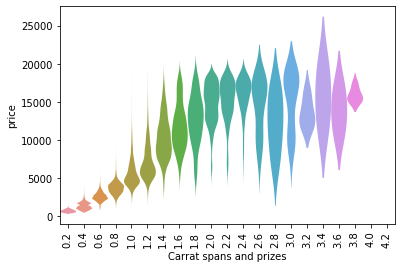

In [180]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

diamonds = sns.load_dataset("diamonds")
bins =  np.arange(diamonds['carat'].min(), diamonds['carat'].max() - 0.2, 0.2)
ind = np.digitize(diamonds['carat'], bins)
diamonds['grouped'] = ind

clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
ax = sns.violinplot(
    x="grouped",
    y="price",
    xlabel=str(bins),
    # hue="clarity",
    # hue_order=clarity_ranking,
    linewidth=0,
    data=diamonds,
    width=1,
    scale='width',
    gridsize=1000,
)
ax.set(xlabel='Carrat spans and prizes')
ax.set_xticklabels(bins.round(1), rotation=90)

print(bins)

Text(0, 0.5, 'Percentage [%]')

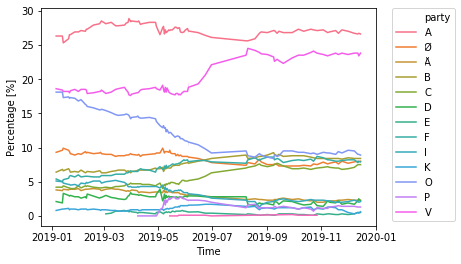

In [181]:
from urllib.request import urlopen
import xml.etree.cElementTree as et

url = 'https://www.b.dk/upload/webred/bmsandbox/opinion_poll/2019/pollofpolls.xml'
xml_data = urlopen(url).read()
root = et.fromstring(xml_data)

df = pd.DataFrame(columns=['datetime', 'party', 'percent'])
for child in root.iter('poll'):
    dt = pd.to_datetime(child.find('datetime').text)
    entries = child.find('entries')
    for entry in entries:
        d = dict()
        d['datetime'] = dt
        d['party'] = entry.find('party').find('letter').text
        d['percent'] = float(entry.find('percent').text)
        df = df.append(d, ignore_index=True)
df['party'] = df['party'].astype('category')

p = sns.lineplot(data=df, x='datetime', y='percent', hue='party')
p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p.set_xlabel('Time')
p.set_ylabel('Percentage [%]')